# Analysing evolution of the simulation

In [25]:
import sys
sys.path.append("..")

from analysis.analysis_utils import extract_all_info_from_hdf5, list_all_hdf5, get_phenotype_table_from_parameters
import numpy as np
import matplotlib.pyplot as plt

In [26]:
dirpath = r"../out/memory_test/E3O2P21R12T17_S75_T0.6_M100_N1000000/"
hdf5_list = list_all_hdf5(dirpath)
_, parameters = extract_all_info_from_hdf5(hdf5_list[-1])
size = parameters["Community size"]
phenotype_table = get_phenotype_table_from_parameters(parameters)

In [27]:
list_adj_matrices = []
inter = []
for f in hdf5_list:
    adj_matrices, params = extract_all_info_from_hdf5(f)
    inter.append(params["Number of interaction"])
    list_adj_matrices.append(adj_matrices)
print(inter)

[np.int64(10000), np.int64(20000), np.int64(30000), np.int64(40000), np.int64(50000), np.int64(60000), np.int64(70000), np.int64(80000), np.int64(90000), np.int64(100000), np.int64(110000), np.int64(120000), np.int64(130000), np.int64(140000), np.int64(150000), np.int64(160000), np.int64(170000), np.int64(180000), np.int64(190000), np.int64(200000), np.int64(210000), np.int64(220000), np.int64(230000), np.int64(240000), np.int64(250000), np.int64(260000), np.int64(270000), np.int64(280000), np.int64(290000), np.int64(300000), np.int64(310000), np.int64(320000), np.int64(330000), np.int64(340000), np.int64(350000), np.int64(360000), np.int64(370000), np.int64(380000), np.int64(390000), np.int64(400000), np.int64(410000), np.int64(420000), np.int64(430000), np.int64(440000), np.int64(450000), np.int64(460000), np.int64(470000), np.int64(480000), np.int64(490000), np.int64(500000), np.int64(510000), np.int64(520000), np.int64(530000), np.int64(540000), np.int64(550000), np.int64(560000), 

### Evolution of the probabilities per game and agent

In [32]:
agent = 60
print("Phénotype:", phenotype_table[agent])
game = "HG"

Phénotype: Random


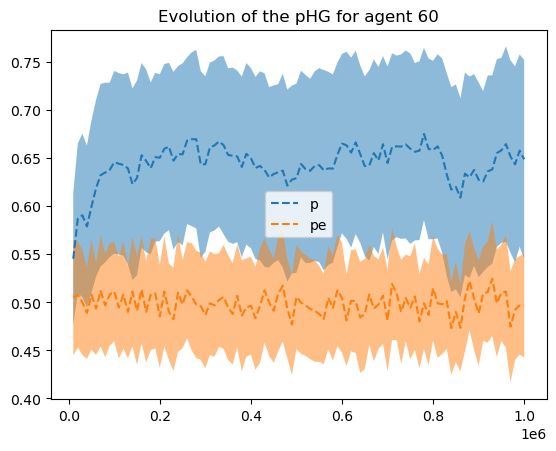

In [33]:
p = np.zeros(len(inter))
p_std = np.zeros(len(inter))
p_std = np.zeros(len(inter))
pe = np.zeros(len(inter))
pe_std = np.zeros(len(inter))
for j in range(len(inter)):
    p[j] = np.mean(list_adj_matrices[j]["p"+game][agent])
    p_std[j] = np.std(list_adj_matrices[j]["p"+game][agent])
    pe[j] = np.mean(list_adj_matrices[j]["pe"+game][agent])
    pe_std[j] = np.std(list_adj_matrices[j]["pe"+game][agent])
plt.plot(inter, p, "--", label="p")
plt.fill_between(inter, p - p_std/2, p+p_std/2, alpha=0.5)
plt.fill_between(inter, pe - pe_std/2, pe+pe_std/2, alpha=0.5)
plt.plot(inter, pe, "--", label="pe")
plt.title("Evolution of the p{0} for agent {1}".format(game, agent))
plt.legend()
plt.show()